In [41]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

plt.style.use("bmh")


# Load Data
Either use the default of loading in the most recent data (i.e., `filename = None`) or fix it to a specific file.

In [47]:
filename = None
if filename is None:
    filename = sorted(glob.glob("out/data/*.csv"))[-1]

print(f"{filename=}")
data = pd.read_csv(filename)
data.head()

filename='out/data/results_2023-04-05_17:22:37.476810.csv'


,num_hidden_layers,store,round,endpoint_name,accuracy,loss,transfer_time,model_size_bytes,local,test_accuracy,test_loss
0,100,proxystore,1.0,hawfinch,0.10,5.303652,0.177070,4992.0,False,0.098,5.303652
1,100,proxystore,2.0,hawfinch,0.11,3.950726,0.370747,4992.0,False,0.098,3.950726
2,100,proxystore,3.0,hawfinch,0.11,3.258306,0.295644,4992.0,False,0.098,3.258306
3,100,proxystore,4.0,hawfinch,0.03,2.921540,0.245689,4992.0,False,0.098,2.921540
4,100,proxystore,5.0,hawfinch,0.14,2.727216,0.207963,4992.0,False,0.098,2.727216


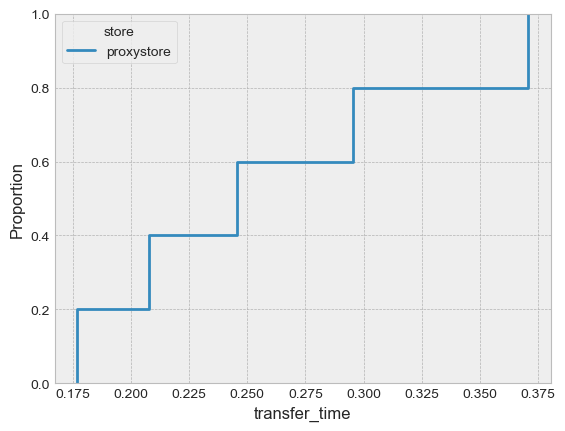

In [43]:
sns.ecdfplot(data=data, x="transfer_time", hue="store")
plt.savefig(Path("out/plots/transfer_time.pdf"))
plt.show()

In [44]:
print(data["transfer_time"].iloc[0])

0.1770699024200439


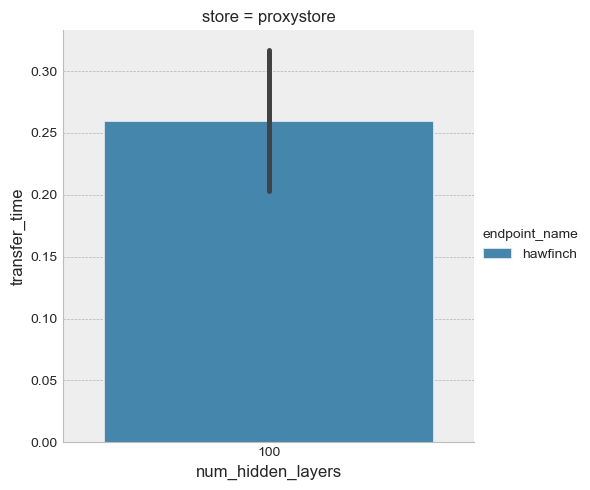

In [45]:
sns.catplot(
    data=data,
    kind="bar",
    col="store",
    x="num_hidden_layers",
    y="transfer_time",
    hue="endpoint_name",
    sharey=False
)
plt.show()

In [46]:
df = data.groupby(["store", "num_hidden_layers"])["transfer_time"].mean()
(df.proxystore - df.no_store) / df.no_store  # Percentage increase from No-Store to ProxyStore
# (df.no_store - df.proxystore) / df.proxystore  # Percentage increase from ProxyStore to No-Store

AttributeError: 'Series' object has no attribute 'no_store'

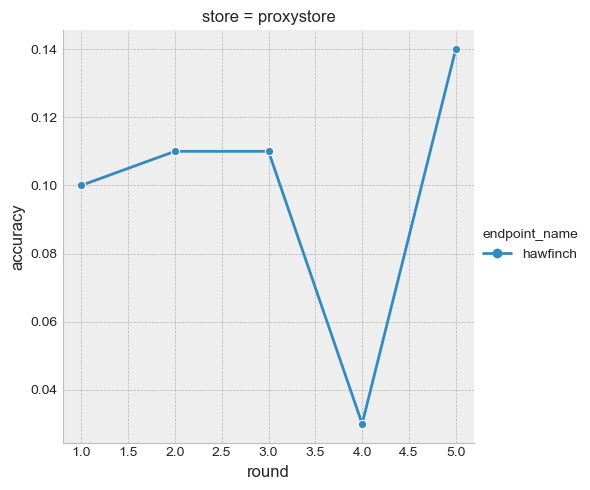

In [48]:
sns.relplot(
    data=data,
    kind="line",
    col="store",
    x="round",
    y="accuracy",
    hue="endpoint_name",
    markers=True,
    style="endpoint_name",
    errorbar=None,
)
plt.show()

In [ ]:
# sns.plot